In [1]:
# Import libraries that will use
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler


import statistics
import scipy.stats as stats

In [2]:
# Read dataframe from .csv
df = pd.read_csv("Backnotes.csv")

In [3]:
# See the data.
# V1. variance of Wavelet Transformed image (continuous), variance of the transformed images.
# V2. skewness of Wavelet Transformed image (continuous), asymmetry of the transformed images.
df

,V1,V2
0,3.62160,8.66610
1,4.54590,8.16740
2,3.86600,-2.63830
3,3.45660,9.52280
4,0.32924,-4.45520
...,...,...
1367,0.40614,1.34920
1368,-1.38870,-4.87730
1369,-3.75030,-13.45860
1370,-3.56370,-8.38270


In [4]:
# Info from Dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      1372 non-null   float64
 1   V2      1372 non-null   float64
dtypes: float64(2)
memory usage: 21.6 KB


In [5]:
# A general statistical description: V1, variance of the transformed images and V2, skewness of the transformed images,
# we have 1372 data each, with an average of V1,0.433 and V2, 1.922. Standard deviation of V1, 2.842 and V2, 5.869 (this means,
# how far the data is from the mean, V2 is twice as far from V1). 75% of the data (are less than these values),
# V2 (6,814) is double V1 (2,821). The minimum for V1 is -7.042 and for V2 is -13.773; the maximum for V1 is 6,824 and for
# V2 is 12,951.
df.describe()

,V1,V2
count,1372.000000,1372.000000
mean,0.433735,1.922353
std,2.842763,5.869047
min,-7.042100,-13.773100
25%,-1.773000,-1.708200
50%,0.496180,2.319650
75%,2.821475,6.814625
max,6.824800,12.951600


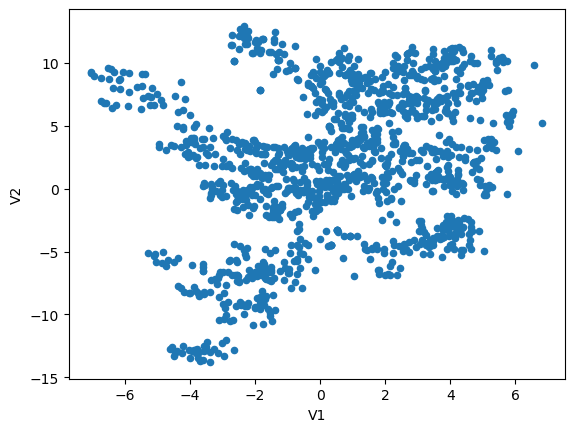

In [6]:
# Graph
df.plot.scatter(x='V1', y='V2')
plt.show()

In [7]:
# Standardizing the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)

# Statistics of scaled data
pd.DataFrame(data_scaled).describe()

,0,1
count,1.372000e+03,1.372000e+03
mean,-8.286213e-17,-4.143106e-17
std,1.000365e+00,1.000365e+00
min,-2.630737e+00,-2.675252e+00
25%,-7.765474e-01,-6.188189e-01
50%,2.197423e-02,6.771828e-02
75%,8.402427e-01,8.338757e-01
max,2.249008e+00,1.879908e+00


In [8]:
# Results
data_scaled

array([[ 1.12180565,  1.14945512],
       [ 1.44706568,  1.06445293],
       [ 1.20780971, -0.77735215],
       ...,
       [-1.47235682, -2.62164576],
       [-1.40669251, -1.75647104],
       [-1.04712236, -0.43982168]])

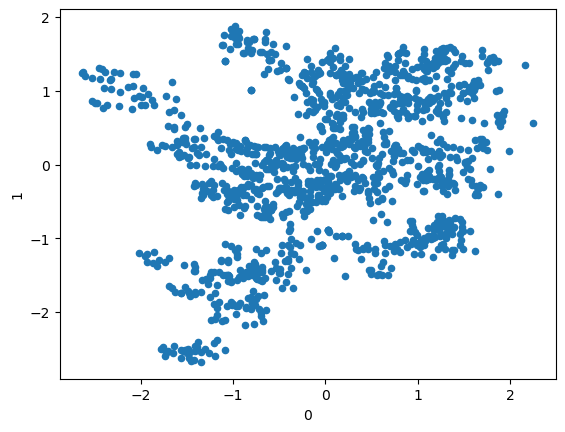

In [9]:
# Convert numpy.ndarray to pandas.DataFrame
df = pd.DataFrame(data_scaled, columns=['0', '1'])

# Create scatter plot
df.plot.scatter(x='0', y='1')
plt.show()

In [10]:
# Initialize kmeans parameters
kmeans_kwargs = {
"init": "random",
"n_init": 10,
"random_state": 1,
}

In [11]:
# Create list to hold SSE values for each k
sse = []

# Iterate over k values
for k in range(1, 11):
    # Create KMeans object with n_clusters=k and **kmeans_kwargs
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)

In [12]:
# Fit the scaled data to the KMeans object
try:
    kmeans.fit(df)
except AttributeError as e:
    if str(e) == "'NoneType' object has no attribute 'split'":
        print("Error: get_config() returned None. Please check your configuration.")
    else:
        raise e


Error: get_config() returned None. Please check your configuration.


In [13]:
# Convert numpy.ndarray to pandas.DataFrame
df = pd.DataFrame(data_scaled, columns=['0', '1'])

In [14]:
# Count if there are nulls
print(df.isnull())

          0      1
0     False  False
1     False  False
2     False  False
3     False  False
4     False  False
...     ...    ...
1367  False  False
1368  False  False
1369  False  False
1370  False  False
1371  False  False

[1372 rows x 2 columns]


In [15]:
# Check for None values
print(df.applymap(lambda x: x is None))

          0      1
0     False  False
1     False  False
2     False  False
3     False  False
4     False  False
...     ...    ...
1367  False  False
1368  False  False
1369  False  False
1370  False  False
1371  False  False

[1372 rows x 2 columns]


In [16]:
# Count null values
print(df.isnull().sum())

0    0
1    0
dtype: int64


In [17]:
# Fit the scaled data to the KMeans object
kmeans.fit(df)

AttributeError: 'NoneType' object has no attribute 'split'

In [ ]:
# Append the SSE value to sse list
sse.append(kmeans.inertia_)


In [ ]:
# Create list to hold SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(data_scaled)
    sse.append(kmeans.inertia_)

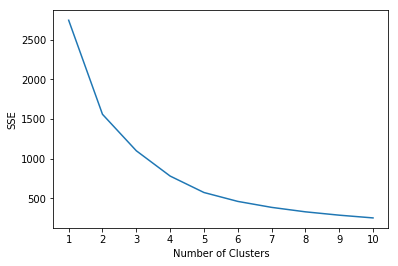

In [ ]:
# Visualize results
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [ ]:
# Tune the KMeans model using the optimal number of clusters
kmeans = KMeans(n_clusters=3, **kmeans_kwargs)
kmeans.fit(data_scaled)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=1, tol=0.0001, verbose=0)

In [ ]:
# View cluster assignments for each observation
kmeans.labels_

array([1, 1, 1, ..., 2, 2, 0], dtype=int32)

In [ ]:
# See results
df['cluster'] = kmeans.labels_

In [ ]:
# Show
print(df)

             0         1  cluster
0     1.121806  1.149455        1
1     1.447066  1.064453        1
2     1.207810 -0.777352        1
3     1.063742  1.295478        1
4    -0.036772 -1.087038        2
5     1.384604  1.320874        1
6     1.111108  0.185881        1
7     0.583612 -1.488408        2
8     0.974571  0.653913        1
9     0.387745  1.236571        1
10    0.278340  1.168511        1
11    1.251410 -0.788994        1
12    0.515730  0.978394        1
13   -0.707505  1.520502        0
14    1.045232  1.159682        1
15    1.493024 -0.905392        1
16    0.787607  0.194693        1
17    0.130137  0.157655        1
18    0.356883 -1.159342        2
19    1.692128  1.551899        1
20    1.883702  1.017205        1
21   -0.036786 -1.087038        2
22    1.232513  1.404462        1
23    0.176690  1.186851        1
24    1.407618  1.357555        1
25    0.095704 -1.264798        2
26    0.249660 -0.965356        2
27   -0.287105  1.102548        0
28    2.156986

In [ ]:
# Initialize the centroids
kmeans_kwargs = {"init": "random", "n_init": 10, "max_iter": 300, "random_state": 42}
kmeans = KMeans(n_clusters=3, **kmeans_kwargs)
kmeans.fit(data_scaled)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

In [ ]:
# Map each point to the nearest centroid
labels = kmeans.predict(data_scaled)

# Update centroids
centroids = kmeans.cluster_centers_

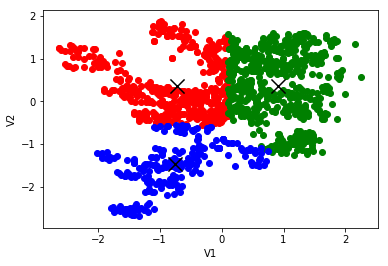

In [ ]:
# Plot the clusters and centroids in a cross
colors = ["r", "g", "b"]
for i in range(3):
    plt.scatter(data_scaled[labels == i][:, 0], data_scaled[labels == i][:, 1], c=colors[i])
plt.scatter(centroids[:, 0], centroids[:, 1], marker="x", s=200, linewidths=3, color="k") 
# Add labels to the axes
plt.xlabel('V1')
plt.ylabel('V2')
plt.show()

In [ ]:
# Groups the data by the value of the column that contains the groups (0 or 1 or 2)
grouped_data_1 = df[df["cluster"] == 0].groupby("cluster").apply(list)

In [ ]:
grouped_data_2 = df[df["cluster"] == 1].groupby("cluster").apply(list)

In [ ]:
grouped_data_3 = df[df["cluster"] == 2].groupby("cluster").apply(list)

In [ ]:
# Calculate the variance and asymmetry of each group
var_data_1 = df[df["cluster"] == 0].groupby("cluster")[["0", "1"]].var()

In [ ]:
var_data_2 = df[df["cluster"] == 1].groupby("cluster")[["0", "1"]].var()

In [ ]:
var_data_3 = df[df["cluster"] == 2].groupby("cluster")[["0", "1"]].var()

In [ ]:
skew_data_1 = df[df["cluster"] == 0].groupby("cluster")[["0", "1"]].skew()

In [ ]:
skew_data_2 = df[df["cluster"] == 1].groupby("cluster")[["0", "1"]].skew()

In [ ]:
skew_data_3 = df[df["cluster"] == 2].groupby("cluster")[["0", "1"]].skew()

In [ ]:
# Show the results
print("Varianza 1:")
print(var_data_1)
print("Varianza 2:")
print(var_data_2)
print("Varianza 3:")
print(var_data_3)

print("Asimetría 1:")
print(skew_data_1)
print("Asimetría 2:")
print(skew_data_2)
print("Asimetría 3:")
print(skew_data_3)

Varianza 1:
                0         1
cluster                    
0        0.410466  0.436135
Varianza 2:
                0         1
cluster                    
1        0.231104  0.593402
Varianza 3:
                0         1
cluster                    
2        0.385501  0.283472
Asimetría 1:
                0         1
cluster                    
0       -0.919005  0.632968
Asimetría 2:
                0         1
cluster                    
1        0.046892 -0.315668
Asimetría 3:
               0         1
cluster                   
2        0.44075 -0.424104


In [ ]:
#F
# Calculate the variance of each group
varianza_1 = df[df["cluster"] == 0].groupby("cluster")[["0", "1"]].var()
varianza_2 = df[df["cluster"] == 1].groupby("cluster")[["0", "1"]].var()
varianza_3 = df[df["cluster"] == 2].groupby("cluster")[["0", "1"]].var()

In [ ]:
# Create a DataFrame with the three variances of each column: 0 and 1
variances = pd.DataFrame({'varianza_1':[0.410466, 0.436135], 'varianza_2': [0.231104, 0.593402], 'varianza_3': [0.385501, 0.283472]})

# Calculate the mean of the three variances
mean_variances = variances.mean(axis=1)

In [ ]:
print(mean_variances)

0    0.342357
1    0.437670
dtype: float64


In [ ]:
# Calculate the combined variance
varianza_combinada = ((len(df[df["cluster"] == 0]) - 1) * variances['varianza_1']) + ((len(df[df["cluster"] == 1]) - 1) * variances['varianza_2']) + ((len(df[df["cluster"] == 2]) - 1) * variances['varianza_3']) / (len(df) - len(variances))

In [ ]:
print(varianza_combinada)

0    344.407758
1    577.759403
dtype: float64


In [ ]:
#Calculate the mean of each cluster (0, 1)
media_c1 = df[df["cluster"] == 0].groupby("cluster")[["0", "1"]].mean()
media_c2 = df[df["cluster"] == 1].groupby("cluster")[["0", "1"]].mean()
media_c3 = df[df["cluster"] == 2].groupby("cluster")[["0", "1"]].mean()

In [ ]:
print("Media cluster 0:", media_c1)
print("Media cluster 1:", media_c2)
print("Media cluster 2:", media_c3)

Media cluster 0:                 0         1
cluster                    
0       -0.722008  0.345107
Media cluster 1:                 0         1
cluster                    
1        0.918038  0.361762
Media cluster 2:                 0         1
cluster                    
2       -0.759113 -1.479973


In [ ]:
# Calculates the general mean column 0 (including the two clusters)
mean0 = df[["0"]].mean().mean()
print(mean0)

-8.286212661925366e-17


In [ ]:
# Calculate the general mean column 1 (including the two clusters)
mean1 = df[["1"]].mean().mean()
print(mean1)

-4.143106330962683e-17


In [ ]:
# Calculate the overall mean (both columns together, which would be wrong??)
mean = df[["0", "1"]].mean().mean()
print(mean)

5.421643050283197e-18


In [ ]:
# Calculate the general average
mean = df[["0", "1"]].mean().mean()

# Calculate the sum of squares between the groups
SS_between = ((df[["0", "1"]] - df.groupby("cluster")[["0", "1"]].mean()) ** 2).sum().sum()

# Calculate the number of groups
k = len(df["cluster"].unique())

# Calculate the degrees of freedom between the groups
df_between = k - 1

# Calculate the mean squares between the groups
MS_between = SS_between / df_between

print("The sum of squares between the groups is:", SS_between)

La suma de cuadrados entre los grupos es: 9.182730162259418


In [ ]:
# Calculate the average of each group
group_means = df.groupby("cluster")[["0", "1"]].mean()

# Calculate the sum of squares within the groups
SS_within = ((df[["0", "1"]] - df.groupby("cluster")[["0", "1"]].transform("mean")) ** 2).sum().sum()

# Calculate the number of degrees of freedom within the groups
df_within = len(df) - len(group_means)

# Calculate the mean squares within the groups
MS_within = SS_within / df_within

print("The sum of squares within the groups is:", SS_within)


La suma de cuadrados dentro de los grupos es: 1098.6469003938355


In [ ]:
# Calculate the number of degrees of freedom between groups and within groups
df_between = len(varianza_1) + len(varianza_2) + len(varianza_3) - 3
df_within = len(df) - len(varianza_1) - len(varianza_2) - len(varianza_3)

# Calculate the F test
F = (SS_between / df_between) / (SS_within / df_within)

print(F) #inf is too large a number, "infinity" (The variance within the group was close to zero,
# which makes F large, infinite)

inf


In [ ]:
# Calculate the F statistic and p value
estadistico_f = (SS_between / (len(variances) - 1)) / (SS_within / (len(df) - len(variances)))
valor_p = stats.f.sf(estadistico_f, len(variances) - 1, len(df) - len(variances))

In [ ]:
print(f'Varianza de cada grupo: {variances.values}')
print(f'Media de las varianzas: {mean_variances}')
print(f'Varianza combinada: {varianza_combinada}')
print(f'Suma de cuadrados entre grupos: {SS_between}')
print(f'Suma de cuadrados dentro de los grupos: {SS_within}')
print(f'Estadístico F: {estadistico_f}, valor p: {valor_p}')

Varianza de cada grupo: [[0.410466 0.231104 0.385501]
 [0.436135 0.593402 0.283472]]
Media de las varianzas: 0    0.342357
1    0.437670
dtype: float64
Varianza combinada: 0    344.407758
1    577.759403
dtype: float64
Suma de cuadrados entre grupos: 9.182730162259418
Suma de cuadrados dentro de los grupos: 1098.6469003938355
Estadístico F: 11.450758490089662, valor p: 0.0007348319985942701


In [ ]:
#t
# Calculate the mean and standard deviation of each group
media = df.groupby("cluster")[["0", "1"]].mean()
desviacion_estandar = df.groupby("cluster")[["0", "1"]].std()

In [ ]:
print(f'Media de cada grupo:\n{media}\n')
print(f'Desviación estándar de cada grupo:\n{desviacion_estandar}\n')

Media de cada grupo:
                0         1
cluster                    
0       -0.722008  0.345107
1        0.918038  0.361762
2       -0.759113 -1.479973

Desviación estándar de cada grupo:
                0         1
cluster                    
0        0.640676  0.660405
1        0.480732  0.770326
2        0.620887  0.532421



In [ ]:
# Calculate the t-statistic and p-value
t_statistic, p_value = stats.ttest_ind(df["0"], df["1"])

In [ ]:
print(f'Estadístico t: {t_statistic}')
print(f'Valor p: {p_value}')

Estadístico t: -1.0847503750980699e-15
Valor p: 0.9999999999999991


In [ ]:
# Last conclusions:
# Three clusters (0, 1, 2) via Kmeans, column V1, variance of transformed images and column V2,
# asymmetry of the transformed images, with 1372 data each, with a mean (± is standard deviation) cluster 0,
# mean V1 column -0.722 ± 0.640, mean V2 column 0.345 ± 0.660; cluster 1, column V1 mean 0.918 ± 0.480,
# column V2 mean 0.361 ± 0.770; cluster 2, column V1 mean -0.759 ± 0.620, column V2 mean -1.479 ± 0.532.
# With Statistic F= 11.450 and p = 0.0007, t=-1.084*10-15 and p=0.999, what does all this mean? The results are the following:
# The data from 1372 transformed images have been used to create three clusters (0, 1) using the Kmeans algorithm.
# Column V1 represents the variance of the transformed images and column V2 represents the skewness of the images
# transformed.
# In addition, an F statistic of 11.450 with a p value of 0.0007 has been obtained. This result indicates that there is a relationship
# significant between the predictor variables (column V1 and column V2) and the response variable (the clusters,
# well classified). In other words, the model is significant and the predictor variables have a significant effect
# about clusters.
# On the other hand, the t value it provides is very small (-1.084 x 10^-15) and the p value is very large (0.999).
# This suggests that there is no significant difference between the groups in terms of the predictor variables.